# Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.linear_model import RANSACRegressor

In [3]:
import pickle

# Loading Data

In [4]:
df = pd.read_csv('/Users/aritrar/Documents/ML/heart/heart_2020_cleaned.csv')

# Understanding  Data

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.info()   

# no null values present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# checking for the different categories in qualitative values 

for i in df:                 
    if df[i].dtype == object:
        print(i + ':')
        print(df[i].unique(),'\n')
        

HeartDisease:
['No' 'Yes'] 

Smoking:
['Yes' 'No'] 

AlcoholDrinking:
['No' 'Yes'] 

Stroke:
['No' 'Yes'] 

DiffWalking:
['No' 'Yes'] 

Sex:
['Female' 'Male'] 

AgeCategory:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity:
['Yes' 'No'] 

GenHealth:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Asthma:
['Yes' 'No'] 

KidneyDisease:
['No' 'Yes'] 

SkinCancer:
['Yes' 'No'] 



In [8]:
#Separating Qualitative and Quantitative Values

quan = []
qual = []

for i in df:                 
    if df[i].dtype == object:
        qual.append(i)
    else:
        quan.append(i)
        
print(qual)
print()
print(quan)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


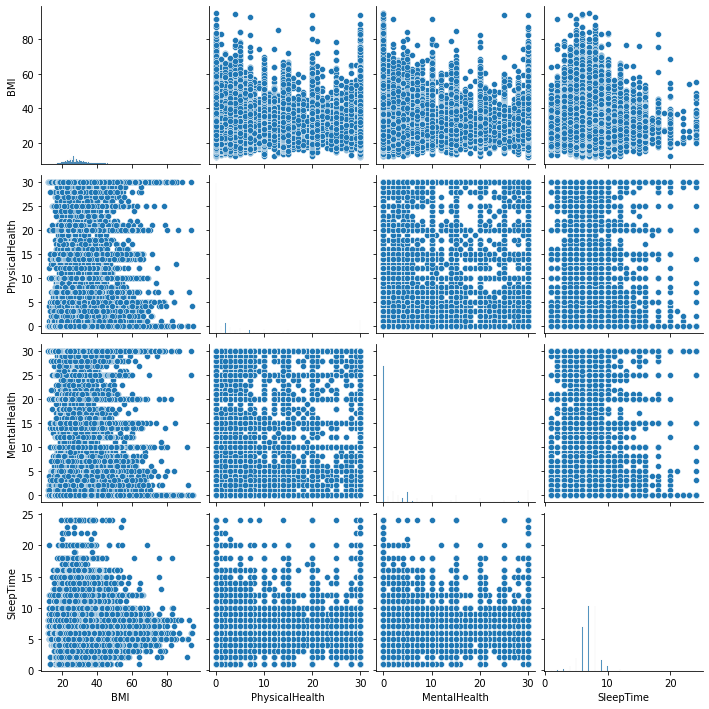

In [9]:
sns.pairplot(df[quan])

# Preprocessing Data

In [10]:
#One - Hot Encoding
    
df = pd.get_dummies(df, columns = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'])

In [11]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,Smoking_No,...,Sex_Female,Sex_Male,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,16.60,3.0,30.0,55-59,White,Yes,Very good,5.0,0,...,1,0,0,1,0,1,1,0,0,1
1,No,20.34,0.0,0.0,80 or older,White,No,Very good,7.0,1,...,1,0,0,1,1,0,1,0,1,0
2,No,26.58,20.0,30.0,65-69,White,Yes,Fair,8.0,0,...,0,1,0,1,0,1,1,0,1,0
3,No,24.21,0.0,0.0,75-79,White,No,Good,6.0,1,...,1,0,1,0,1,0,1,0,0,1
4,No,23.71,28.0,0.0,40-44,White,No,Very good,8.0,1,...,1,0,0,1,1,0,1,0,1,0


In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
#Label Encoding

df['AgeCategory'] = label_encoder.fit_transform(df['AgeCategory'])
df['AgeCategory'].unique()

array([ 7, 12,  9, 11,  4, 10,  8,  6,  5,  0,  3,  2,  1])

In [14]:
#Label Encoding

df['Race'] = label_encoder.fit_transform(df['Race'])
df['Race'].unique()

array([5, 2, 1, 0, 4, 3])

In [15]:
#Label Encoding

df['Diabetic'] = label_encoder.fit_transform(df['Diabetic'])
df['Diabetic'].unique()

array([2, 0, 1, 3])

In [16]:
#Label Encoding

df['GenHealth'] = label_encoder.fit_transform(df['GenHealth'])
df['GenHealth'].unique()

array([4, 1, 2, 3, 0])

In [17]:
#Label Encoding

df['HeartDisease'] = label_encoder.fit_transform(df['HeartDisease'])
df['HeartDisease'].unique()

array([0, 1])

<AxesSubplot:>

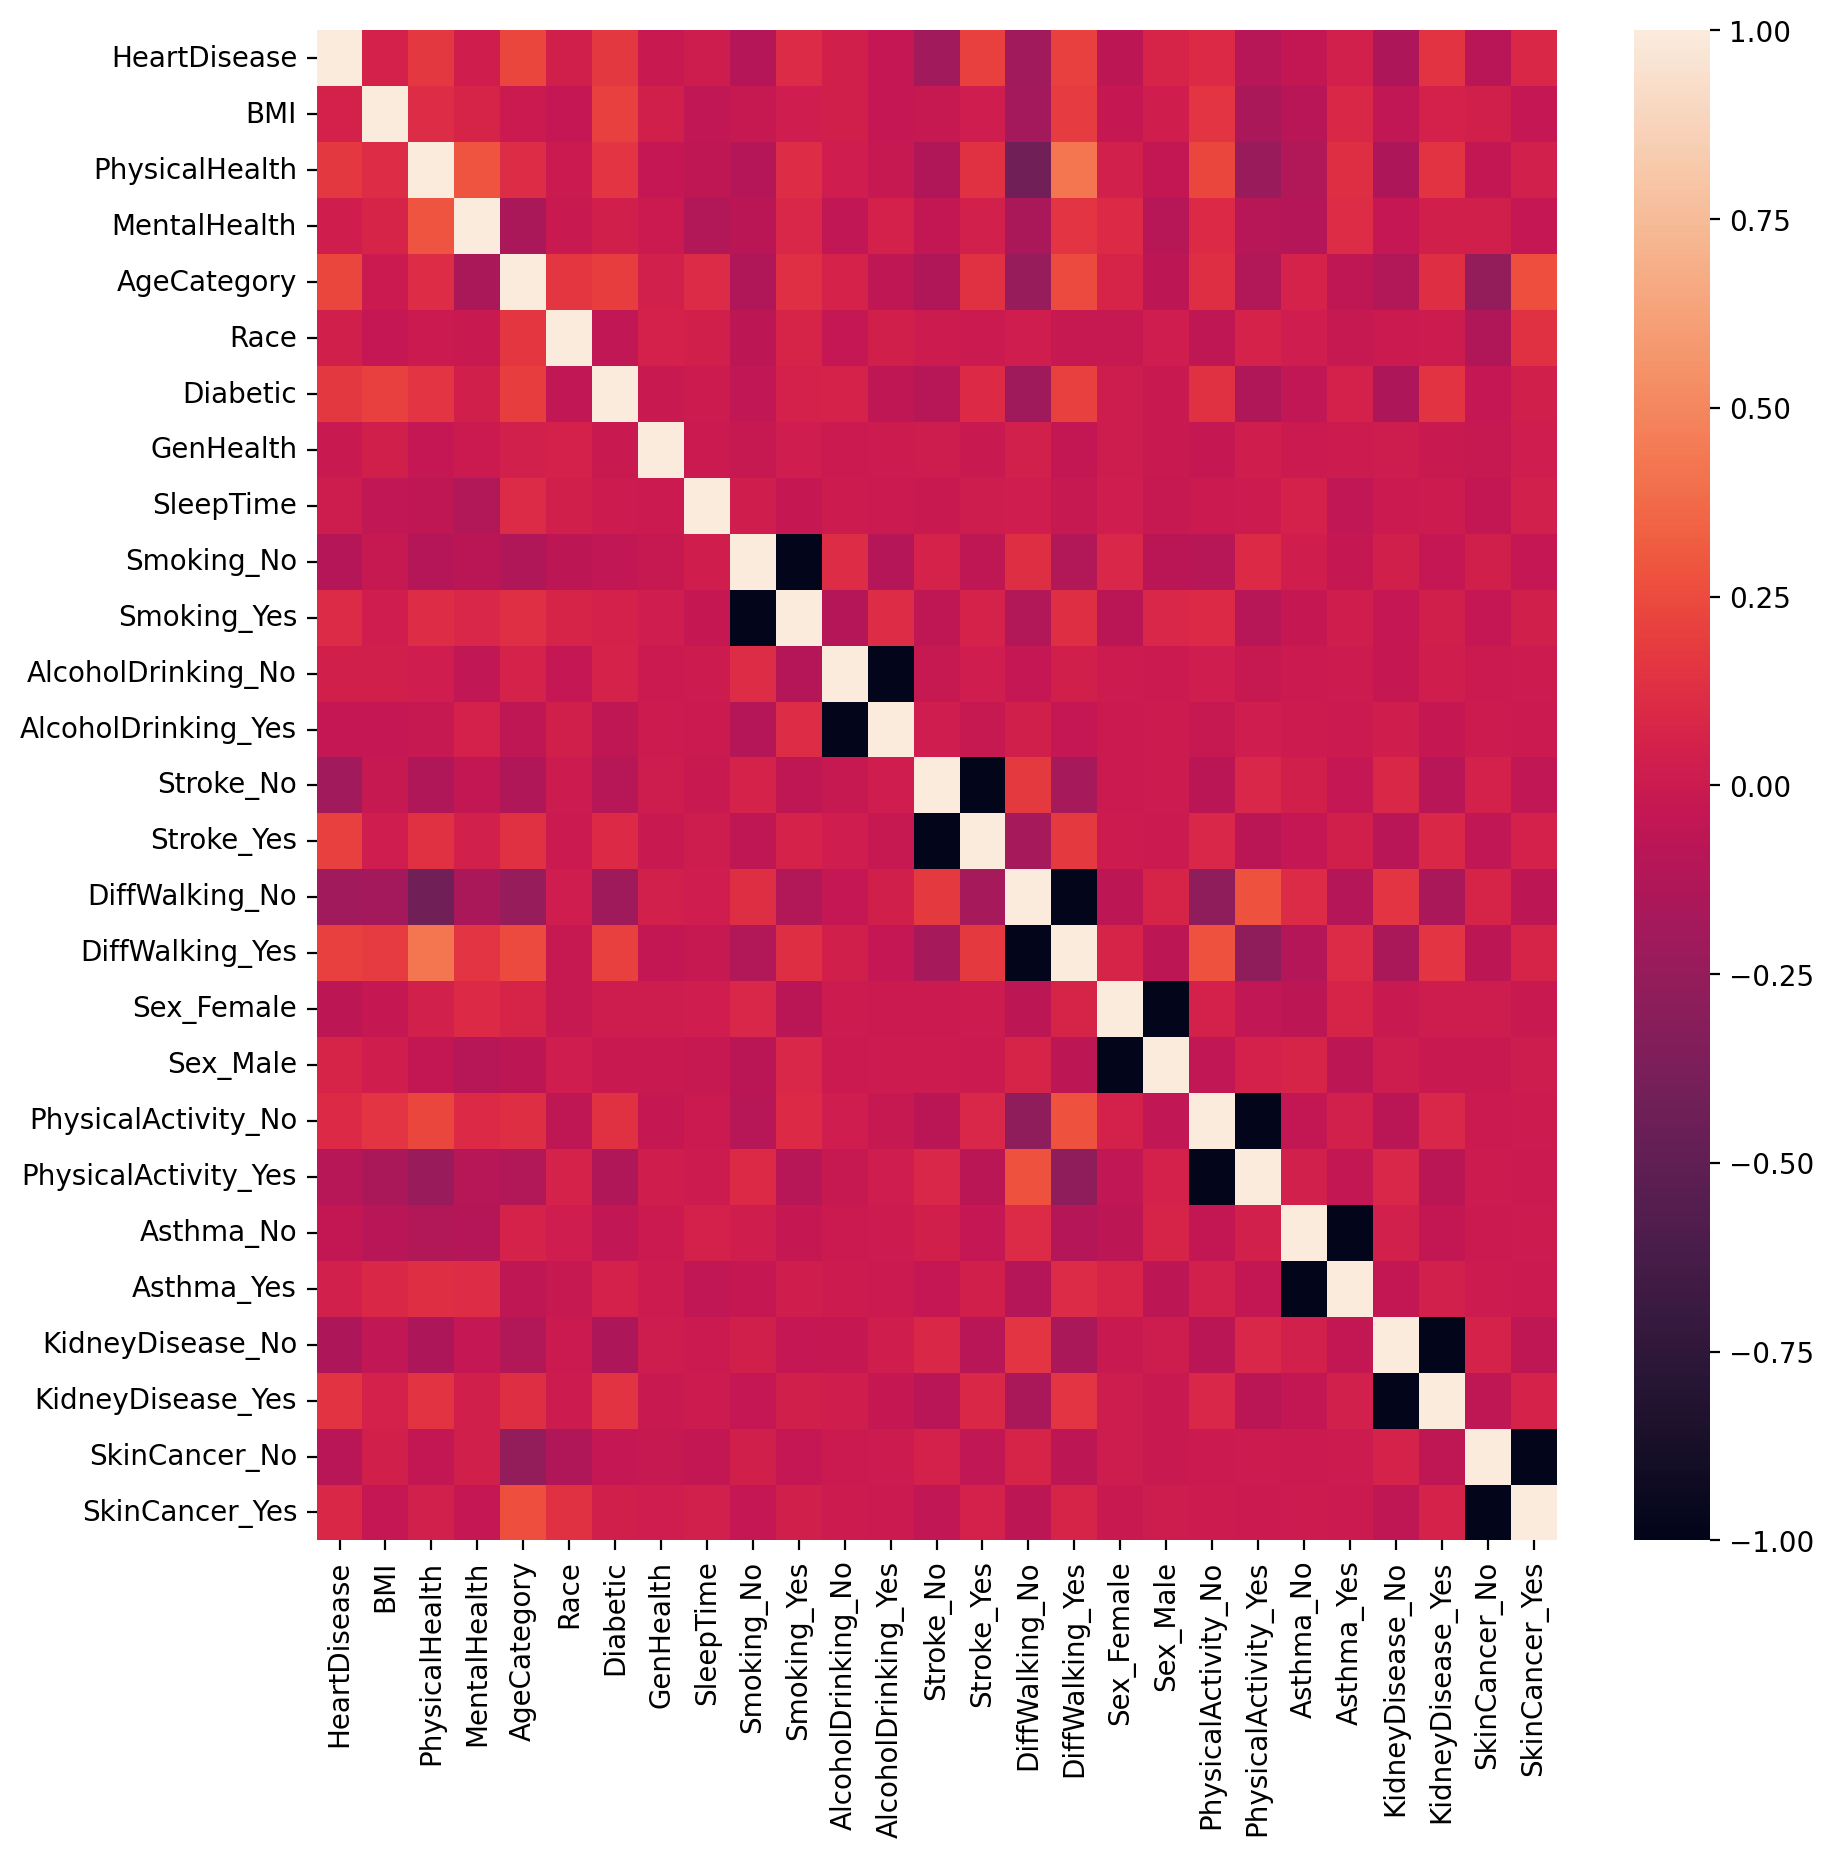

In [18]:
plt.figure(figsize = (10,10), dpi = 200)
sns.heatmap(df.corr())

# Preparing Data For Split and Training

In [19]:
X = df.drop(['HeartDisease'],axis = 1)
y = df['HeartDisease']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    
    print(f'MAE IS {mae}')
    print(f'RMSE IS {rmse}')
    

# Linear Regressor

In [21]:
model=LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

MAE IS 0.14807456178515607
RMSE IS 0.26259158384837533


# Decision tree Regressor

In [22]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE IS 0.13895098223886979
RMSE IS 0.37044349499569273


# Random Forest Regressor

In [23]:
model=RandomForestRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE IS 0.13971442239505616
RMSE IS 0.2724600357527847


# KNN

In [24]:
model=KNeighborsRegressor(n_neighbors=5)
run_model(model,X_train,y_train,X_test,y_test)

MAE IS 0.13050548007317186
RMSE IS 0.2829322488731719


# XGBoost

In [25]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
preds = xgb_r.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,preds))
mae=mean_absolute_error(y_test,preds)
print(f'MAE IS {mae}')
print(f'RMSE IS {rmse}')

[18:00:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
MAE IS 0.14379536056122016
RMSE IS 0.2584104284784812


In [26]:
# XGBoost gives best results so we deploy this model.

# Ransac

In [27]:
ransac = RANSACRegressor(LinearRegression(),max_trials=4, min_samples=2, loss='absolute_loss',residual_threshold=10)
ransac.fit(X_train, y_train)
preds = ransac.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
mae = mean_absolute_error(y_test,preds)

print(f'MAE IS {mae}')
print(f'RMSE IS {rmse}')

MAE IS 0.14810388268906888
RMSE IS 0.2625952611373061


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


# Saving Model Using Pickle

In [28]:
pickle.dump(xgb_r, open('/Users/aritrar/cleanheart/Models/heart_model.pkl', 'wb'))